In [2]:
# Import required Python package
!pip install snscrape
!pip install pyvis
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubunt

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import threading
import operator

from networkx.algorithms.community import girvan_newman
from pyvis.network import Network
from IPython.core.display import display, HTML

In [ ]:
# Crawl Data
# File to store the tweet harvest
filename = 'techbros.csv'

search_keyword = 'techbros since:2024-01-01'
limit = 1000

# Token can be found in your cookie as auth_token when you've logged in to Twitter.
!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token "240ee7b2cd1eb84d848b21e3ecf47327e07ff712"

In [33]:
import pandas as pd

filename = 'techbros.csv'

# Specify the path to your CSV file
file_path = f"{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [8]:
# Display the DataFrame
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1774738201313223155,Mon Apr 01 09:58:54 +0000 2024,360,Respect Lawyers. Respect Doctors. Respect Tech...,1774738201313223155,NaN,NaN,en,United States,36,61,101,https://twitter.com/JelaniMK/status/1774738201...,269831494,JelaniMK
1,1774502052623769983,Sun Mar 31 18:20:32 +0000 2024,32,Talking to Indian techbros be like Tag em in t...,1774502052623769983,https://pbs.twimg.com/ext_tw_video_thumb/17745...,NaN,en,"Miami, FL",0,4,2,https://twitter.com/ArcKau/status/177450205262...,971452550057623552,ArcKau
2,1774236170928677145,Sun Mar 31 00:44:01 +0000 2024,281,Designer sekalinya bakuhantam langsung sama ma...,1774236170928677145,NaN,NaN,in,Global,8,25,51,https://twitter.com/dadimdum/status/1774236170...,1104292046842474497,dadimdum
3,1774514494435148188,Sun Mar 31 19:09:59 +0000 2024,490,So COCOBOD bought those chinese keyboard from ...,1774514494435148188,https://pbs.twimg.com/media/GKBXhwRX0AAOhaP.jpg,NaN,en,"Accra, Ghana",66,93,247,https://twitter.com/StatsGH/status/17745144944...,2535269459,StatsGH
4,1773050333528252718,Wed Mar 27 18:11:55 +0000 2024,855,Nolan is a gimmicky filmmaker. He appeals to t...,1773050333528252718,NaN,NaN,en,Neo fascist nation.,190,108,82,https://twitter.com/asuph/status/1773050333528...,14448856,asuph


In [11]:
df.shape

(774, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      774 non-null    int64 
 1   created_at               774 non-null    object
 2   favorite_count           774 non-null    int64 
 3   full_text                774 non-null    object
 4   id_str                   774 non-null    int64 
 5   image_url                89 non-null     object
 6   in_reply_to_screen_name  337 non-null    object
 7   lang                     774 non-null    object
 8   location                 588 non-null    object
 9   quote_count              774 non-null    int64 
 10  reply_count              774 non-null    int64 
 11  retweet_count            774 non-null    int64 
 12  tweet_url                774 non-null    object
 13  user_id_str              774 non-null    int64 
 14  username                 774 non-null    o

In [57]:
# Show how many rows of data are there before preprocessing
num_tweets = len(df)
print(f"There are {num_tweets} number of tweets before preprocessing")

There are 337 number of tweets before preprocessing


In [176]:
# Preprocess the data
df = df[['id_str', 'username', 'in_reply_to_screen_name', 'full_text', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'lang']].dropna()
df.drop_duplicates(inplace=True)

df['username'] = df['username'].astype(str)
df['id_str'] = df['id_str'].astype(str)

In [38]:
# Display the DataFrame
df.head(3)

,id_str,username,in_reply_to_screen_name,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,conversation_id_str
13,1774635656687538661,rabotsigah,StatsGH,@StatsGH TechBros posted this on Jiji in Dec 2...,0,3,3,6,en,1774514494435148188
18,1775202142825099538,HidayatTaufiqur,bongcoy_,@bongcoy_ join Discord KodingAjaDulu kal cult ...,0,1,0,0,in,1775171729582879082
32,1773832964679295057,MichaelEMann,MichaelEMann,Remember if you're a climate advocate the tech...,2,7,41,203,en,1773830284091310237


In [177]:
# Show how many rows of data are there after preprocessing
num_tweets = len(df)
print(f"There are {num_tweets} number of tweets after preprocessing.")

There are 337 number of tweets after preprocessing.


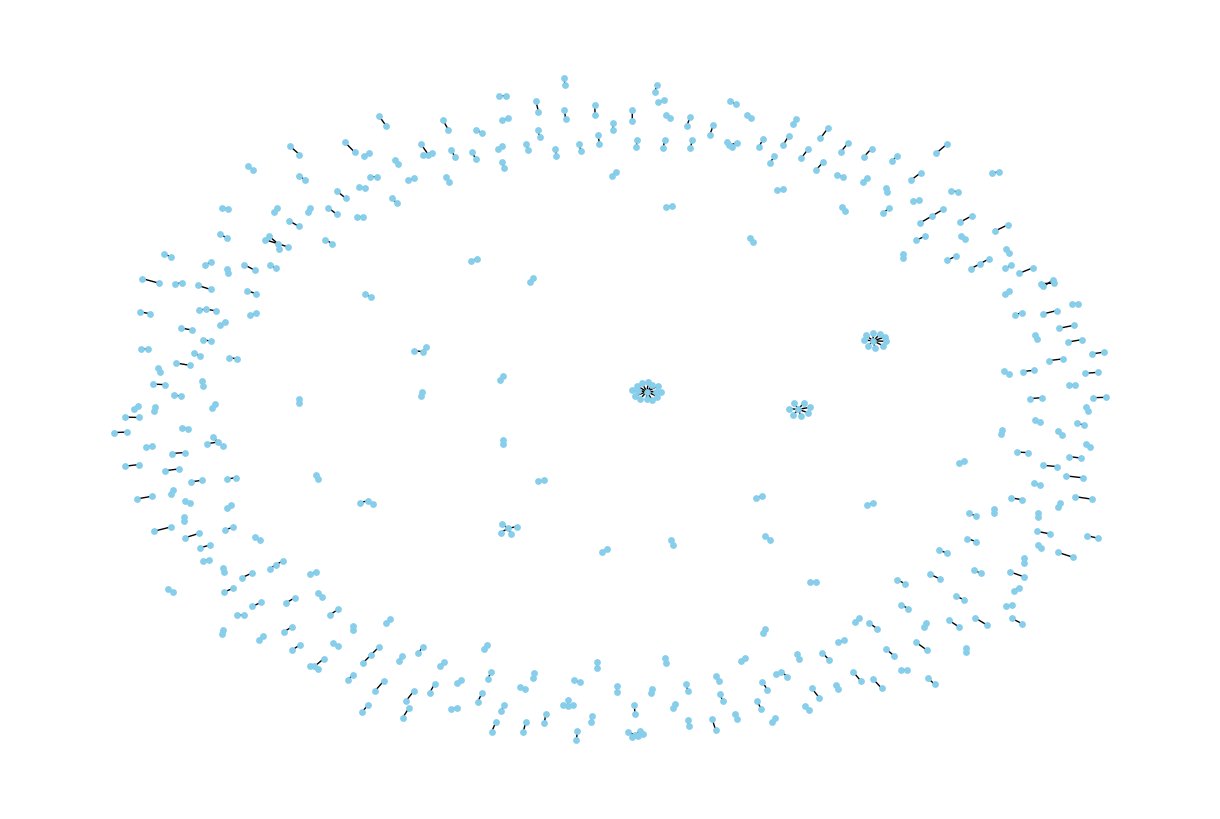

In [40]:
# Create graph
G = nx.from_pandas_edgelist(df, 'id_str', 'username')
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=False, node_size=15, node_color='skyblue', font_size=8)
plt.show()

In [41]:
print ("Number of nodes: ", G.size())
print ("Number of edges: ", G.order())

Number of nodes:  337
Number of edges:  631


In [134]:
# Apply Girvan-Newman algorithm
def girvan_newman_communities(G):
    comp = girvan_newman(G)
    communities = tuple(sorted(c) for c in next(comp))
    return communities

communities = girvan_newman_communities(G)

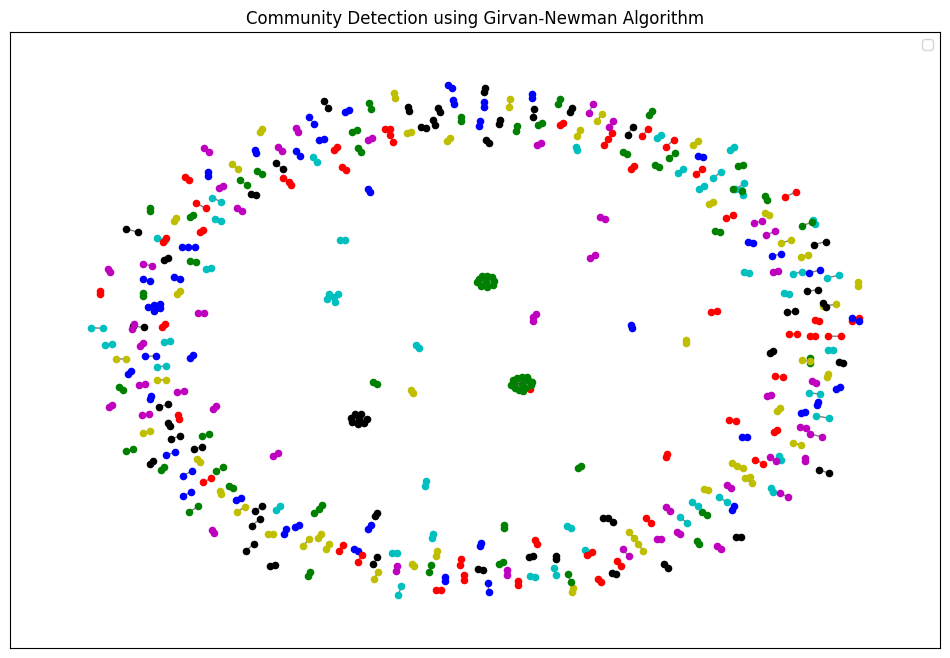

In [102]:
# Visualize communities
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, community, node_size=20, node_color=colors[i % len(colors)])
    # nx.draw_networkx_nodes(G, pos, community, node_size=25, node_color=colors[i % len(colors)])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Community Detection using Girvan-Newman Algorithm')
plt.legend()
plt.show()

In [103]:
print(f"There are: {len(communities)} total of communities")


There are: 295 total of communities


In [104]:
# Limit the number of communities to the top N for visualization
def top_n_communities(communities, n=10):
    sorted_communities = sorted(communities, key=len, reverse=True)
    return sorted_communities[:n]

top_communities = top_n_communities(communities, n=10)
print(f"Visualizing top {len(top_communities)} communities out of {len(communities)}")

Visualizing top 10 communities out of 295


In [154]:
for i, community in enumerate(top_communities):
    print(f"Community {i + 1} size: {len(community)}")

Community 1 size: 14
Community 2 size: 10
Community 3 size: 8
Community 4 size: 5
Community 5 size: 5
Community 6 size: 4
Community 7 size: 3
Community 8 size: 3
Community 9 size: 3
Community 10 size: 3


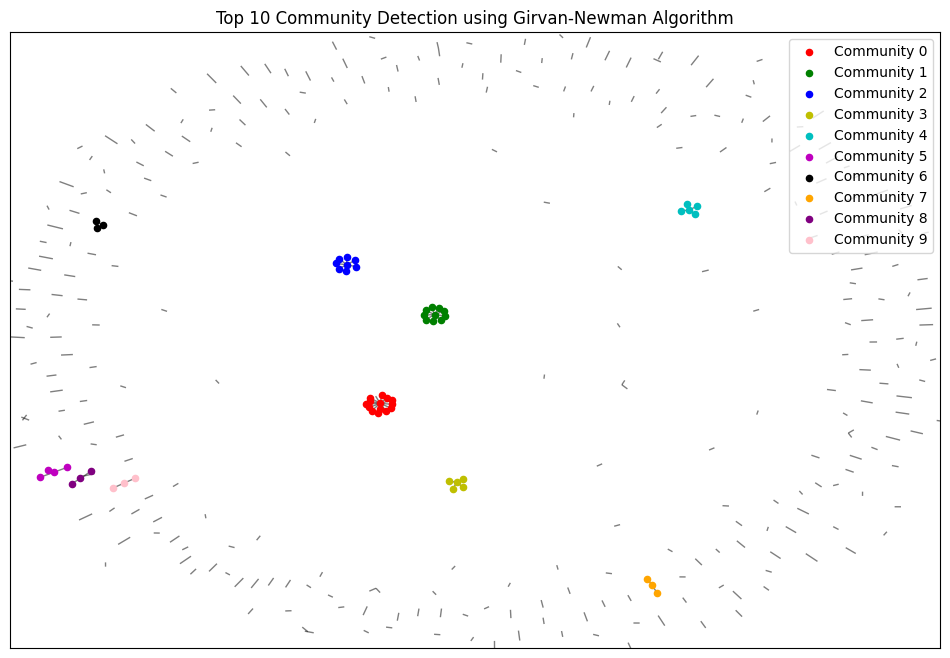

In [168]:
# Visualize top communities
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'pink']

for i, community in enumerate(top_communities):
    nx.draw_networkx_nodes(G, pos, community, node_size=20, node_color=colors[i % len(colors)], label=f'Community {i}')
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Set axis limits to zoom in
plt.xlim(-0.95, 0.95)
plt.ylim(-0.95, 0.95)

plt.title(f'Top {len(top_communities)} Community Detection using Girvan-Newman Algorithm')
plt.legend()
plt.show()

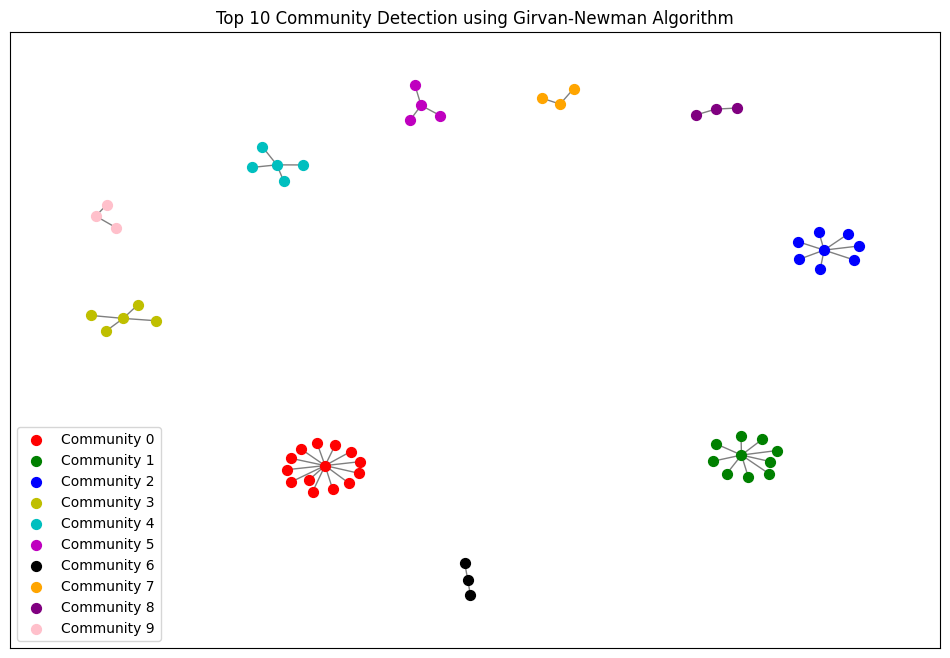

In [170]:
# Create a subgraph that only includes nodes from the top communities
top_nodes = set()
for community in top_communities:
    top_nodes.update(community)

subgraph = G.subgraph(top_nodes)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'pink']

# Draw each community with a different color
for i, community in enumerate(top_communities):
    community_subgraph = subgraph.subgraph(community)
    nx.draw_networkx_nodes(community_subgraph, pos, node_size=50, node_color=colors[i % len(colors)], label=f'Community {i}')

nx.draw_networkx_edges(subgraph, pos, alpha=0.5)
# nx.draw_networkx_labels(subgraph, pos, font_size=8, font_color='black')
plt.title(f'Top {len(top_communities)} Community Detection using Girvan-Newman Algorithm')
plt.legend()
plt.show()

In [175]:
# Visualize the graph using pyvis
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

for node in subgraph.nodes:
    net.add_node(node, label=node)

for edge in subgraph.edges:
    net.add_edge(edge[0], edge[1])

net.show_buttons(filter_=['physics'])
net.save_graph('network.html')

In [172]:
community_dict = {i: community for i, community in enumerate(top_communities)}

# Find the maximum length of community lists
max_len = max(len(community) for community in top_communities)

# Create a DataFrame by padding shorter lists with NaNs
community_df = pd.DataFrame({k: v + [None]*(max_len - len(v)) for k, v in community_dict.items()})

# Save to CSV if needed
community_df.to_csv('community_data.csv', index=False, header=True)

# Display the DataFrame
community_df

,0,1,2,3,4,5,6,7,8,9
0,1773122419063951407,1772912430173085757,1772950149863543267,1772773455789691219,1742245949303595442,1772818819150426207,1773214935851425865,1773826957182156894,1772928191360905551,1772791145388724371
1,1773478115416695111,1772918980690223388,1772950719873638912,1773690946980388960,1742725313820508309,1773496435515834694,1773858107392999454,1775461670535520699,1773116178258329814,1773279098434986439
2,1773581377805369414,1772920234506129662,1773641324157128788,1773917543885103189,1743461063449075888,1775545728426750351,kat_loveland,prisonrodeo,WendiBones,izzat_techbros
3,1773581495799595449,1773071558992400861,1773659506989216249,1774847316924752201,1743761278231863382,furwerkstudio,None,None,None,None
4,1773610484056399970,1773592464982429901,1773659610714354008,averageenjoye13,JonLamArt,None,None,None,None,None
5,1773652904370487326,1773633001483542993,1773981167659659719,None,None,None,None,None,None,None
6,1773784372220756360,1774048932554781000,1774137103795802443,None,None,None,None,None,None,None
7,1773793142833025370,1774051598957768727,TechBros_7,None,None,None,None,None,None,None
8,1773845864328441924,1775456083420565935,None,None,None,None,None,None,None,None
9,1774009039749267641,_kvngNath,None,None,None,None,None,None,None,None


In [173]:
num_of_members = community_df.shape[0] - community_df.isna().sum()
num_of_members

0    14
1    10
2     8
3     5
4     5
5     4
6     3
7     3
8     3
9     3
dtype: int64

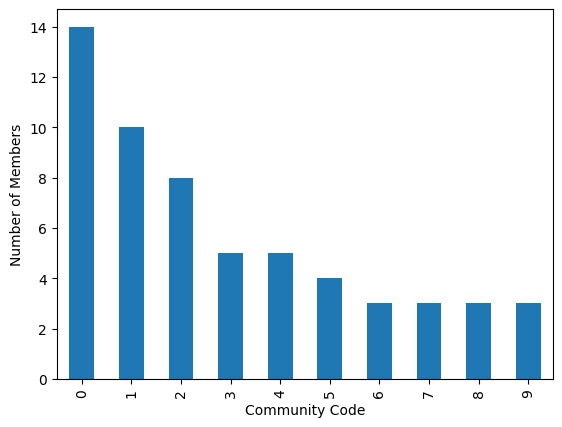

In [174]:
num_of_members.head(10).sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Community Code")
plt.ylabel('Number of Members')
plt.show()

In [167]:
print('Top 10 communities')
print('-------------------------')
num_of_members.sort_values(ascending=False)

Top 10 communities
-------------------------


0    14
1    10
2     8
3     5
4     5
5     4
6     3
7     3
8     3
9     3
dtype: int64

In [75]:
# Define functions to calculate centrality measures
def calculate_centralities(graph):
    centralities = {
        'degree': nx.degree_centrality(graph),
        'closeness': nx.closeness_centrality(graph),
        'betweenness': nx.betweenness_centrality(graph),
        'eigenvector': nx.eigenvector_centrality(graph, max_iter=1000)
    }
    return centralities

def display_top_centralities(centralities):
    for key, values in centralities.items():
        sorted_values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True)[:5])
        print(f'TOP 5 NODES BY {key.upper()} CENTRALITY:')
        print(sorted_values)

Community 1 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 1 most common words: [('Thanks', 6), ('@Ekitipikin', 2)

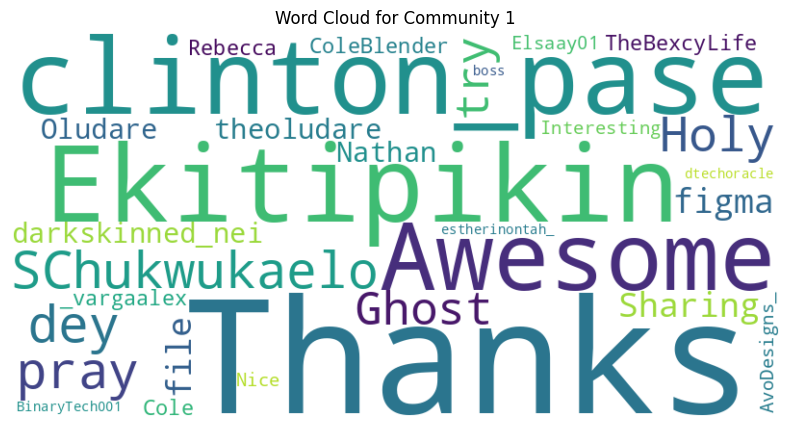

Community 2 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 2 most common words: [('to', 4), ('I', 3), ('me', 3), (

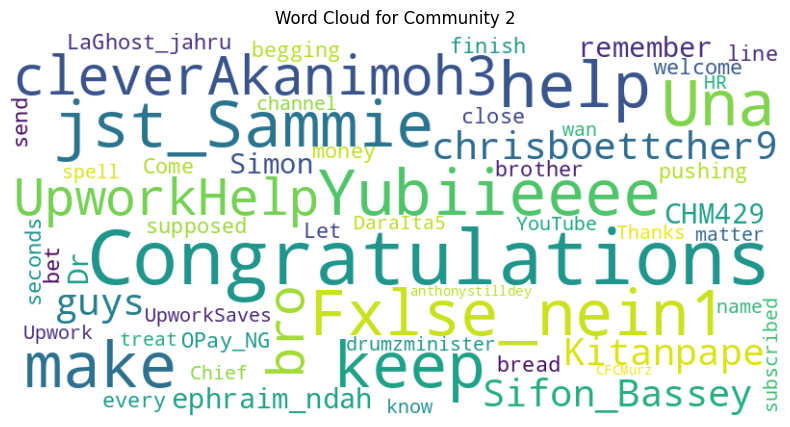

Community 3 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 3 most common words: [('you', 5), ('I', 4), ('@abia_com

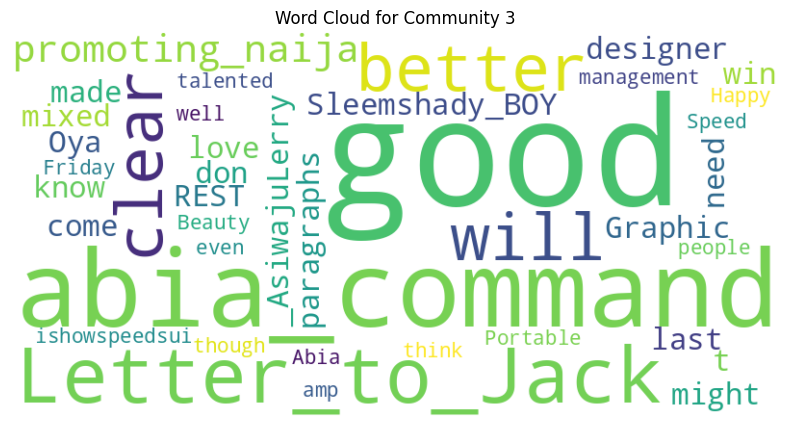

Community 4 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 4 most common words: [('@83dollaroring', 3), ('techbros

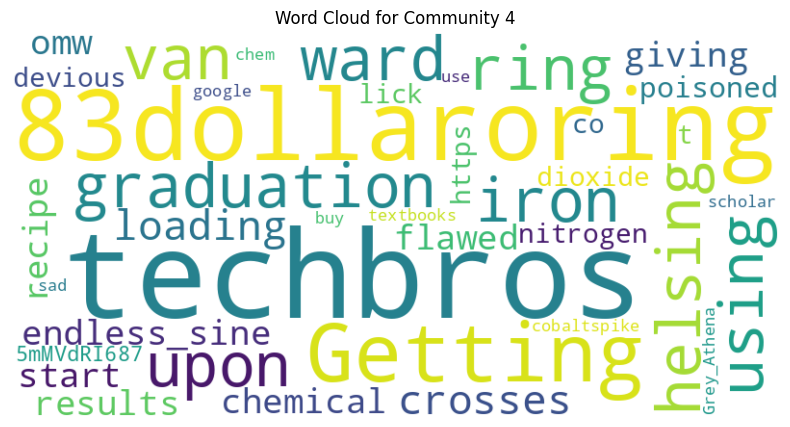

Community 5 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 5 most common words: [('the', 6), ('and', 5), ('to', 4)

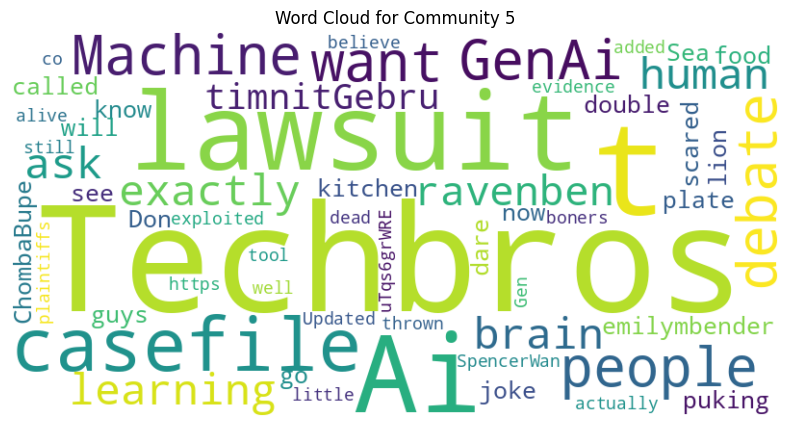

Community 6 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 6 most common words: [('to', 5), ('a', 5), ('the', 3), 

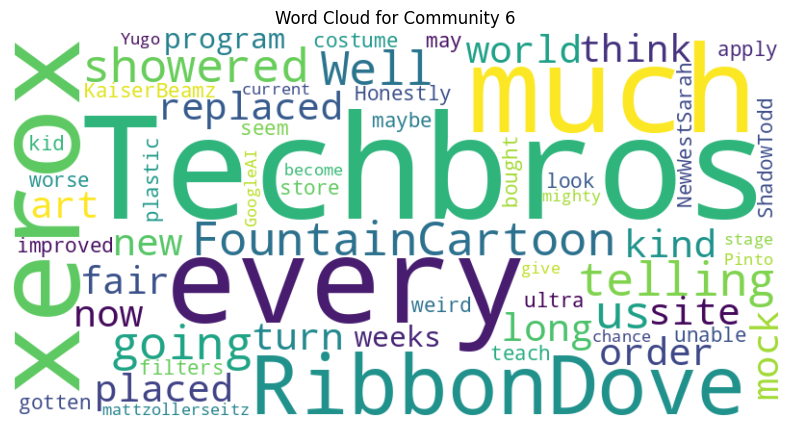

Community 7 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 7 most common words: [('like', 2), ('techbros', 2), ('y

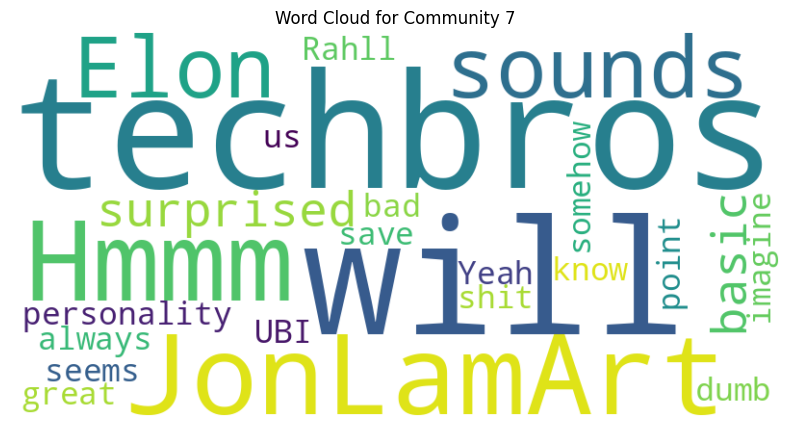

Community 8 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 8 most common words: [('teach', 2), ('Techbros', 2), ('

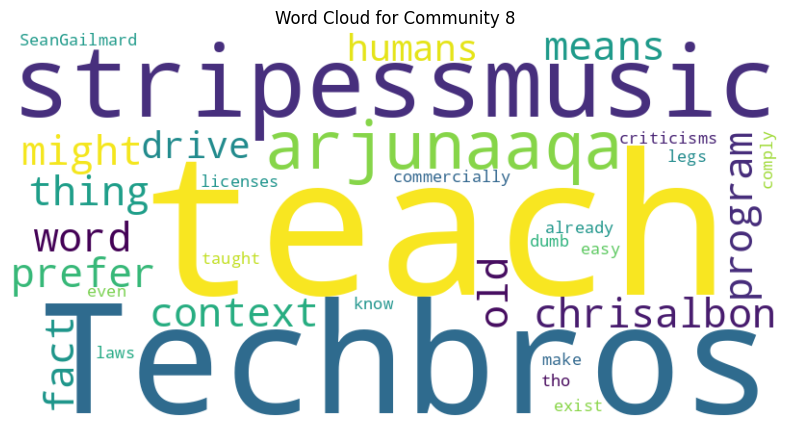

Community 9 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 9 most common words: [('my', 4), ('for', 3), ('I', 3), 

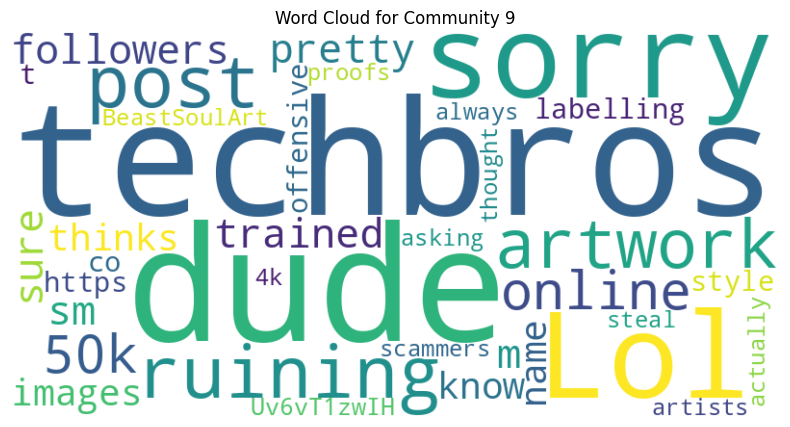

Community 10 Analysis:
TOP 5 NODES BY DEGREE CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, 'averageenjoye13': 0.07017543859649122, 'JonLamArt': 0.07017543859649122}
TOP 5 NODES BY CLOSENESS CENTRALITY:
{'__Jaytech': 0.22807017543859648, '_kvngNath': 0.15789473684210525, 'TechBros_7': 0.12280701754385964, '1773610484056399970': 0.11859649122807017, '1773122419063951407': 0.11859649122807017}
TOP 5 NODES BY BETWEENNESS CENTRALITY:
{'__Jaytech': 0.04887218045112782, '_kvngNath': 0.022556390977443608, 'TechBros_7': 0.013157894736842105, 'averageenjoye13': 0.0037593984962406013, 'JonLamArt': 0.0037593984962406013}
TOP 5 NODES BY EIGENVECTOR CENTRALITY:
{'__Jaytech': 0.7071067760332013, '1773610484056399970': 0.19611613370890282, '1773122419063951407': 0.19611613370890282, '1774573215995576798': 0.19611613370890282, '1773652904370487326': 0.19611613370890282}
Community 10 most common words: [('@itjustempty', 1), ('Boek', 1

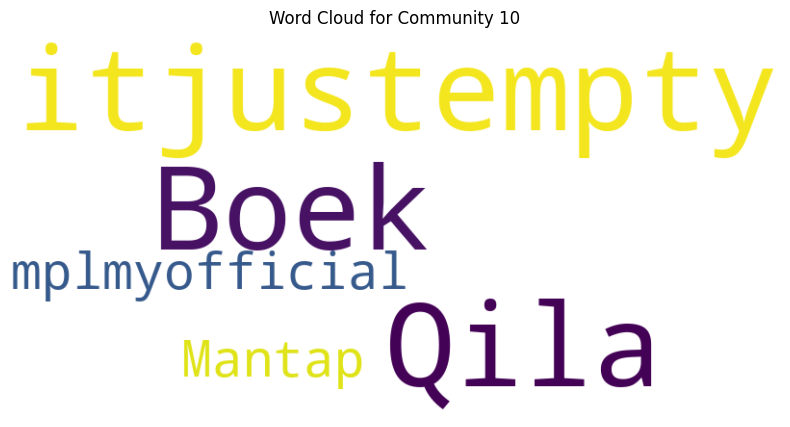

In [78]:
from collections import Counter
from wordcloud import WordCloud

def analyze_community(community, community_id):
    centralities = calculate_centralities(subgraph)

    print(f"Community {community_id} Analysis:")
    display_top_centralities(centralities)

    # Text analysis
    tweets = df[df['username'].isin(community)]['full_text'].dropna().values
    all_words = ' '.join(tweets).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(10)

    print(f"Community {community_id} most common words: {most_common_words}")

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Community {community_id}')
    plt.axis('off')
    plt.show()

    print('='*200)
    print('='*200)

for i, community in enumerate(top_communities):
    analyze_community(community, i+1)